In [1]:
import os
os.chdir('/engram/nklab/hossein/recurrent_models/BLT_models')
!pwd

%matplotlib inline 
import matplotlib.pyplot as plt

import datasets
import pandas as pd
import numpy as np
import csv
import torch
from matplotlib.patches import Rectangle
import torchvision
from PIL import Image
from models.cornet import get_cornet_model
import torch.nn as nn
from collections import OrderedDict
import rsatoolbox
import torch.nn.functional as F

import warnings
warnings.filterwarnings("ignore")

device = 'cuda' if torch.cuda.is_available() else 'cpu'

from analyze_representations import sample_vggface2, calc_rdms, plot_maps, compare_rdms,\
  plot_recurrent_rdms, reduce_dim, plot_dim_reduction_one, sample_FEI_dataset, \
  plot_rdm_mds, load_model_path, load_pretrained_models, extract_features, kasper_dataset

/engram/nklab/hossein/recurrent_models/BLT_models


56 56 1
56 56 1
56 56 1
56 28 2
28 28 1
28 28 1
28 28 1
28 14 2
14 14 1
14 7 2
7 7 1
Number of model parameters: 7059954
blt(
  (conv_input): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (maxpool_input): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (non_lin_0): ReLU(inplace=True)
  (norm_0): GroupNorm(32, 64, eps=1e-05, affine=True)
  (output_0): Identity()
  (conv_0_0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_0_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (non_lin_1): ReLU(inplace=True)
  (norm_1): GroupNorm(32, 64, eps=1e-05, affine=True)
  (output_1): Identity()
  (conv_1_1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv_1_2): Sequential(
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  )
  (non_lin_2): ReLU(inplace=True)


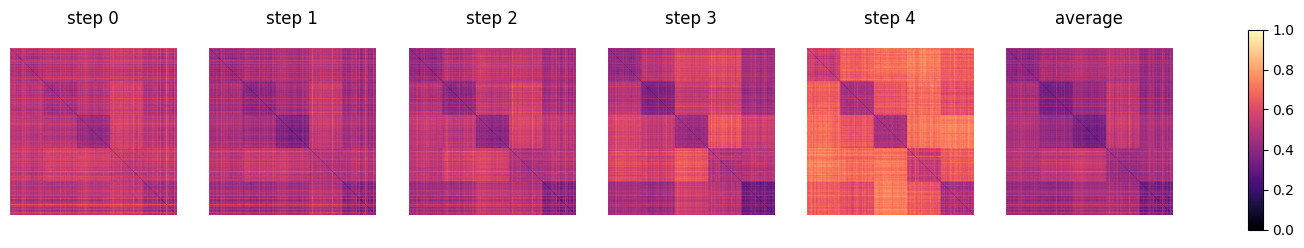

In [2]:
#
model, gap = load_model_path('./results/classification/vggface2/blt_bl/run_2/', print_model=True)
imgs, labels = sample_vggface2(num_cats=5, per_cat=150)
layers = ['output_5' ] #, 'V4', 'V2', 'V1']
save = 'rt8_vggface2'
plot_rdm_mds(model, imgs, labels, layers, num_steps=5, plot='rdm', save=None)

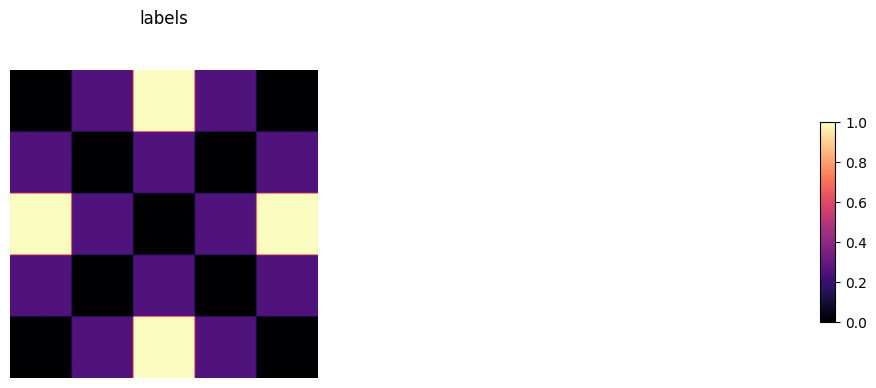

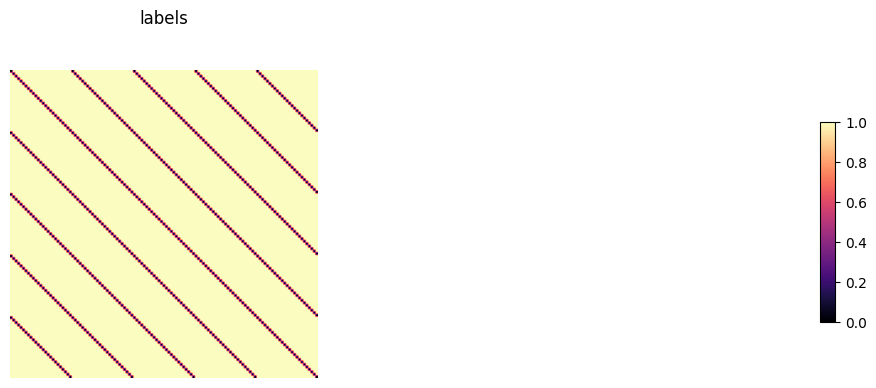

In [3]:
imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=25)

labels_o = labels_o.unsqueeze(1)
labels_m = labels_m.unsqueeze(1)
labels = F.one_hot(labels_i)

rdms, rdms_dict = calc_rdms({'labels' : labels_m.float().numpy()}, method='euclidean')
_ = plot_maps(rdms_dict, save='./results/rdms_m')  #'./results/rdms_m'

rdms, rdms_dict = calc_rdms({'labels' : labels.float().numpy()}, method='euclidean')
_ = plot_maps(rdms_dict, save='./results/rdms_i')  #'./results/rdms_i'

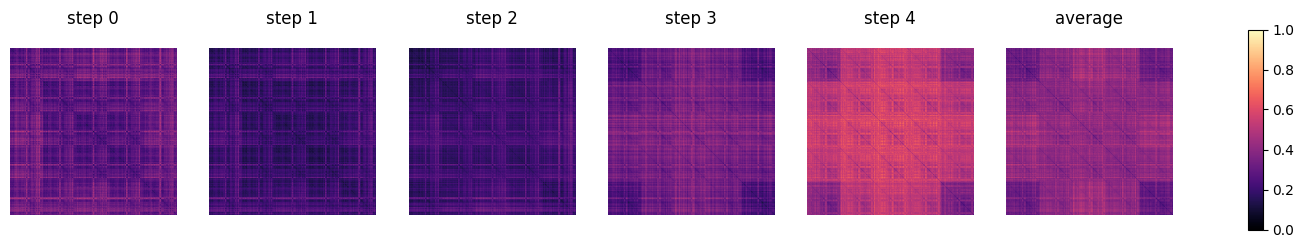

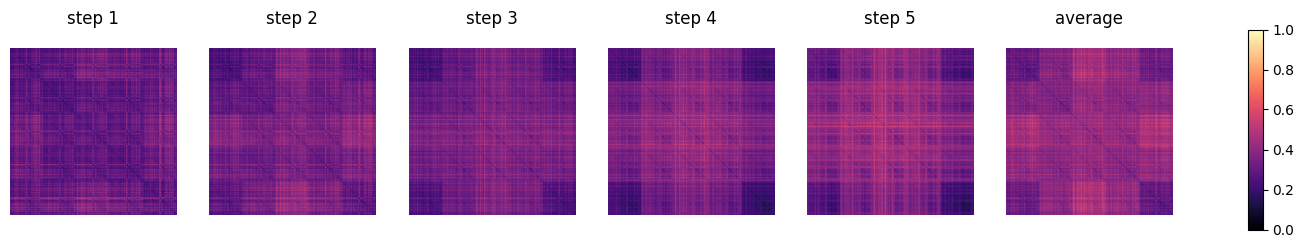

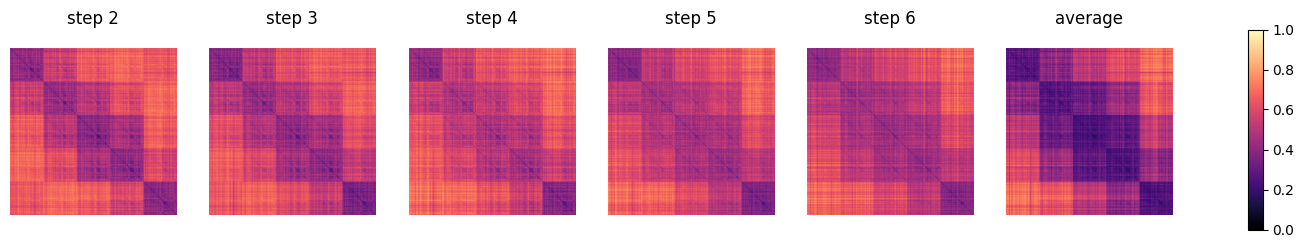

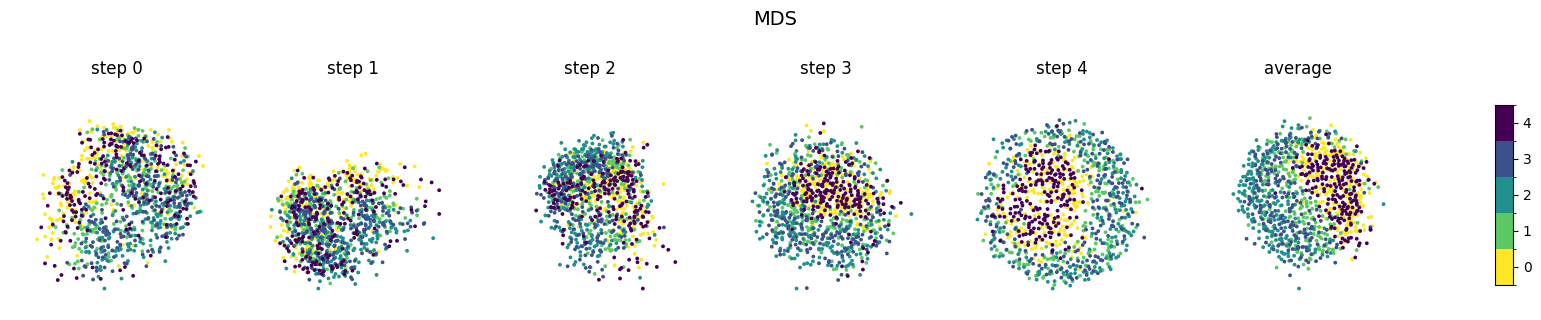

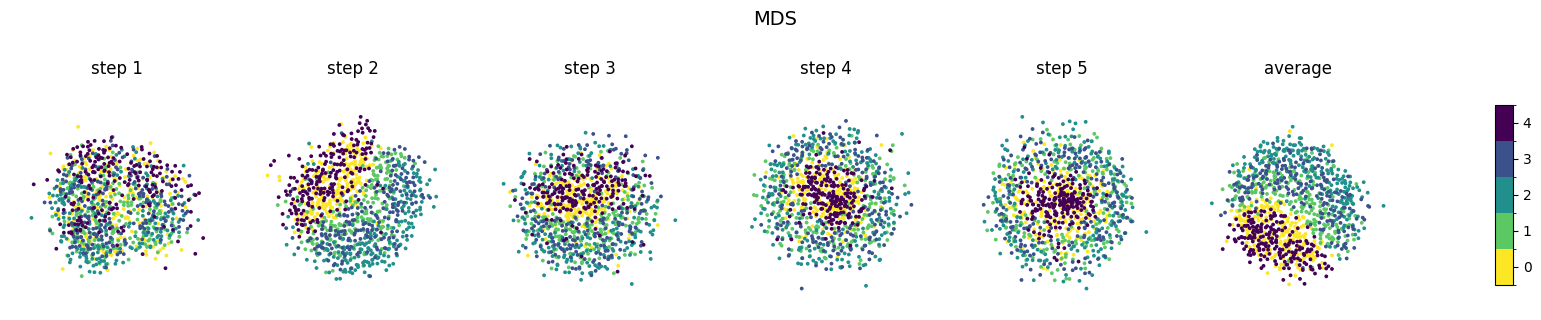

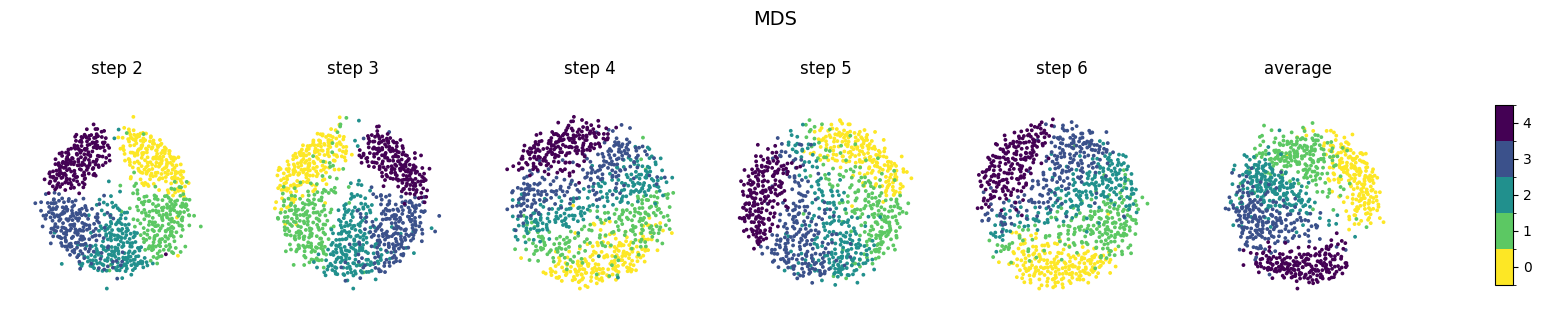

In [8]:
imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=200)
model, gap = load_model_path('./results/classification/vggface2/blt_bl_top2linear/run_2/', print_model=False)
layers = ['output_5', 'output_4', 'output_3'] #, 'output_3', 'output_2', 'output_1', 'output_0']
#layers = ['IT', 'V4', 'V2', 'V1']
save = 'blt_bl_vggface2'
plot_rdm_mds(model, imgs, labels_o, layers, num_steps=5, save=None)

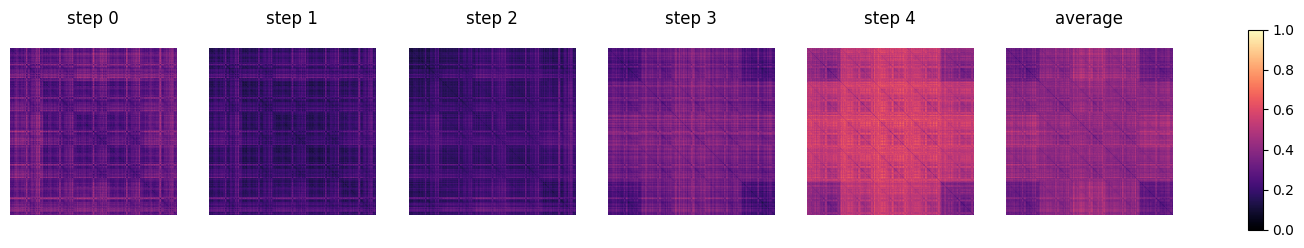

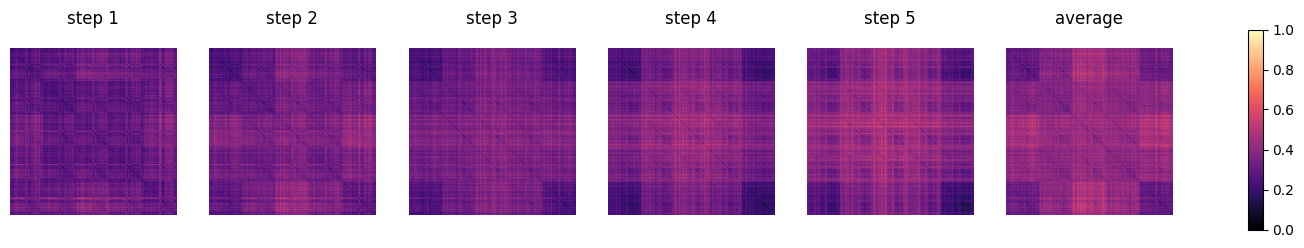

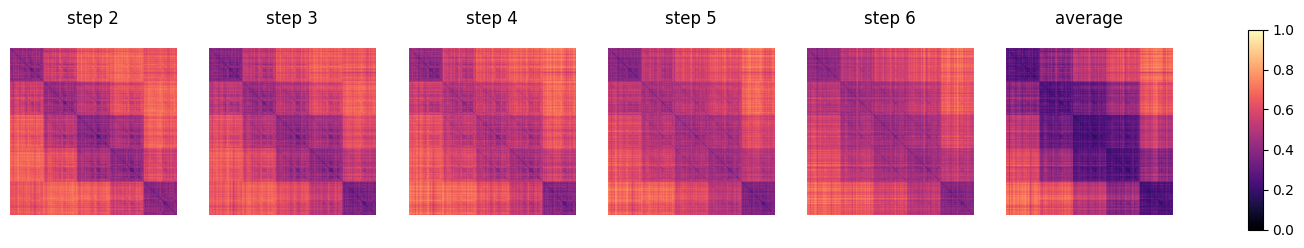

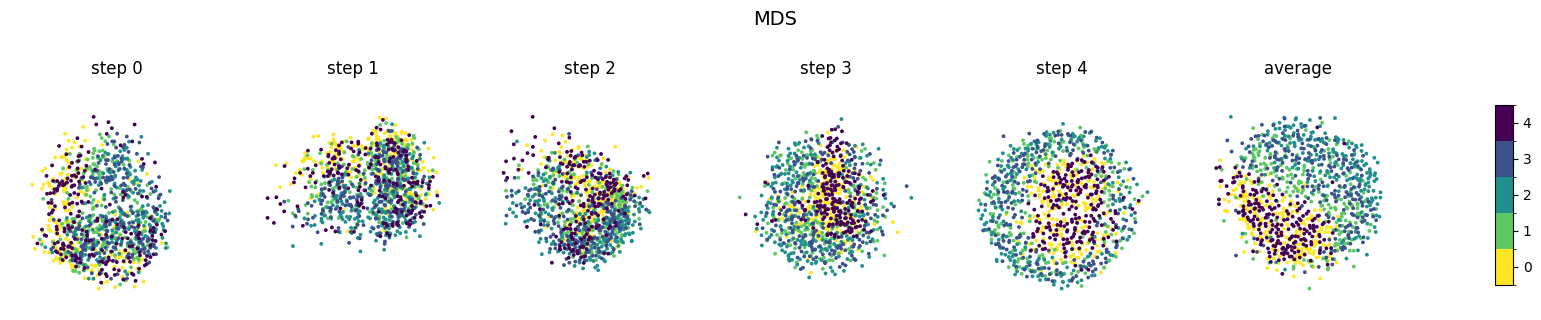

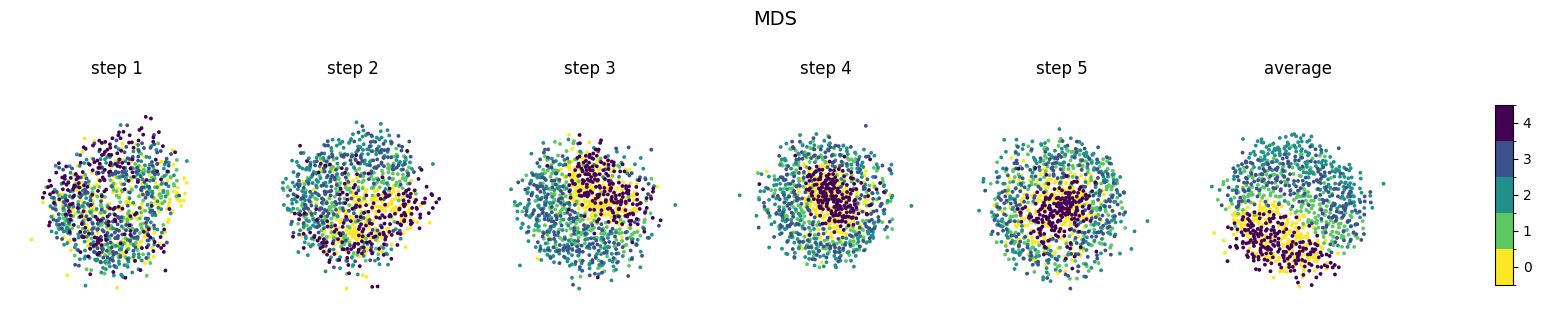

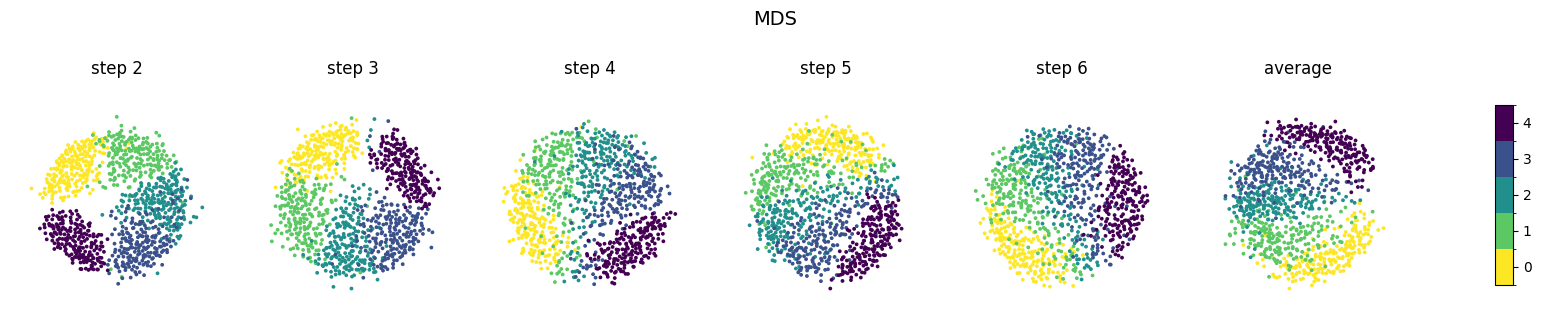

In [8]:
#imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=200)
model, gap = load_model_path('./results/classification/vggface2/blt_bl_top2linear/run_2/', print_model=False)
layers = ['output_5', 'output_4', 'output_3'] #, 'output_3', 'output_2', 'output_1', 'output_0']
#layers = ['IT', 'V4', 'V2', 'V1']
save = 'blt_bl_vggface2'
plot_rdm_mds(model, imgs, labels_o, layers, num_steps=5, save=None)

112 56
56 28
28 28
28 14
14 7
(1, 250, 512)
(1, 250, 512)
(1, 250, 512)
(1, 250, 512)
(1, 1000, 512)
(1, 250, 512)
(1, 250, 512)
(1, 250, 512)
(1, 250, 512)
(1, 1000, 512)
(1, 250, 256)
(1, 250, 256)
(1, 250, 256)
(1, 250, 256)
(1, 1000, 256)
(1, 250, 256)
(1, 250, 256)
(1, 250, 256)
(1, 250, 256)
(1, 1000, 256)
(1, 250, 128)
(1, 250, 128)
(1, 250, 128)
(1, 250, 128)
(1, 1000, 128)
(1, 250, 64)
(1, 250, 64)
(1, 250, 64)
(1, 250, 64)
(1, 1000, 64)


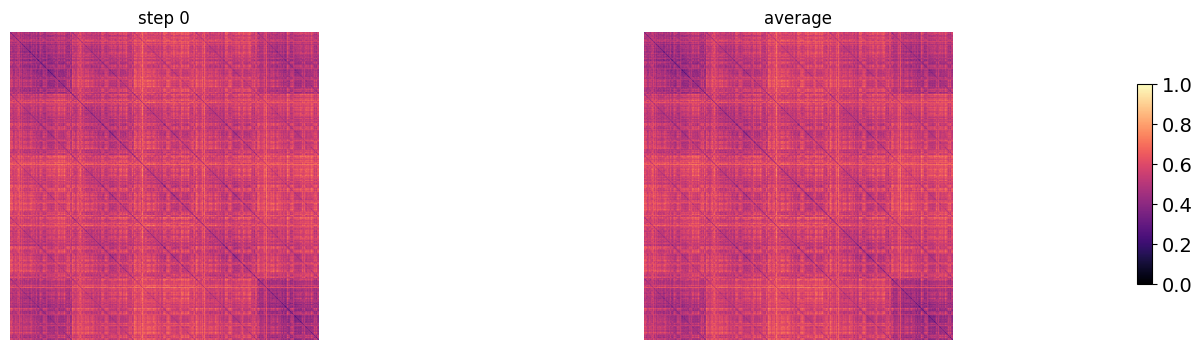

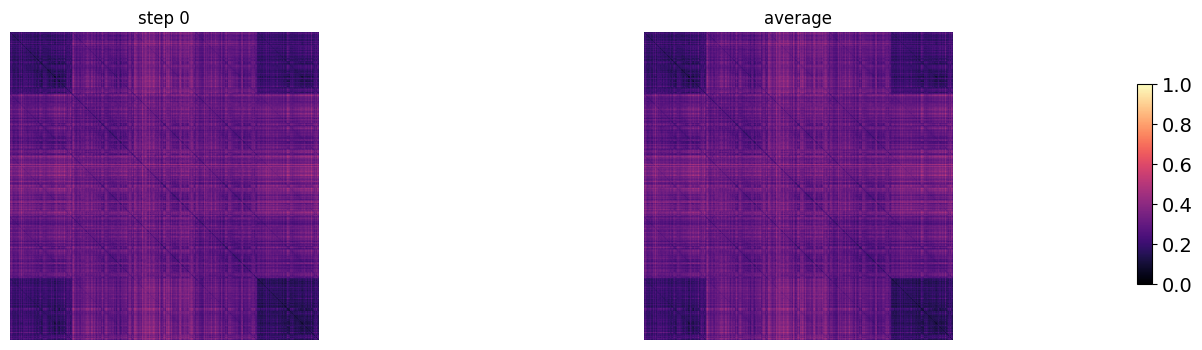

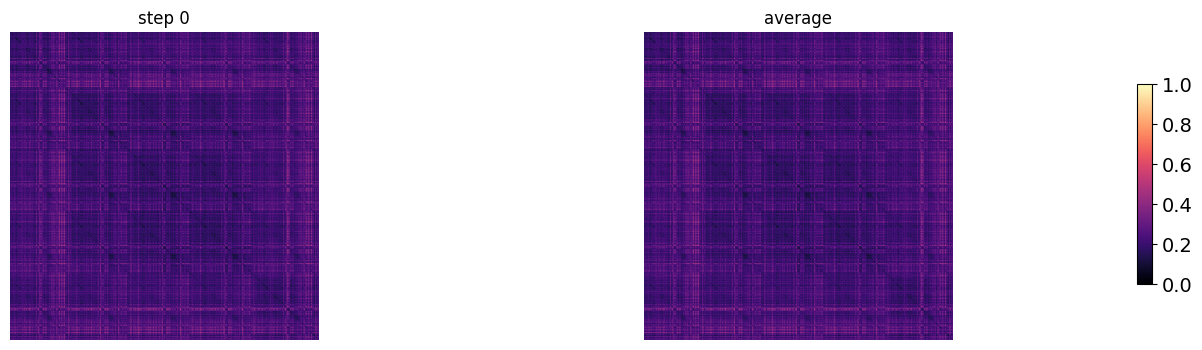

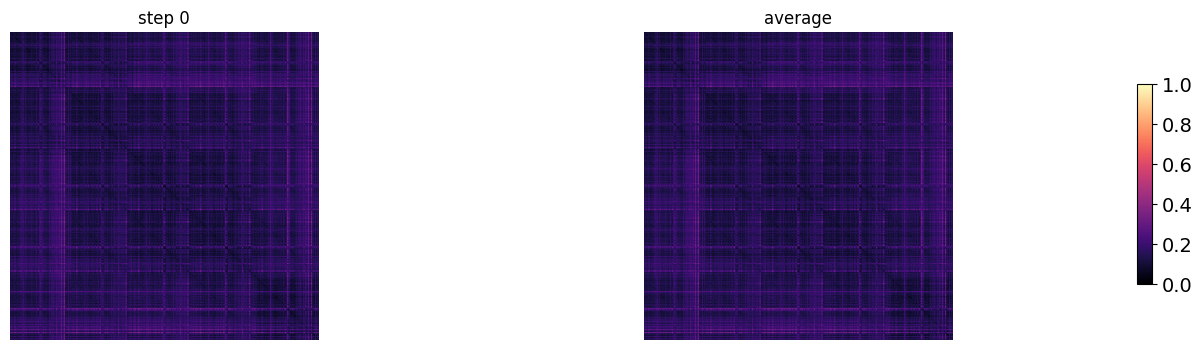

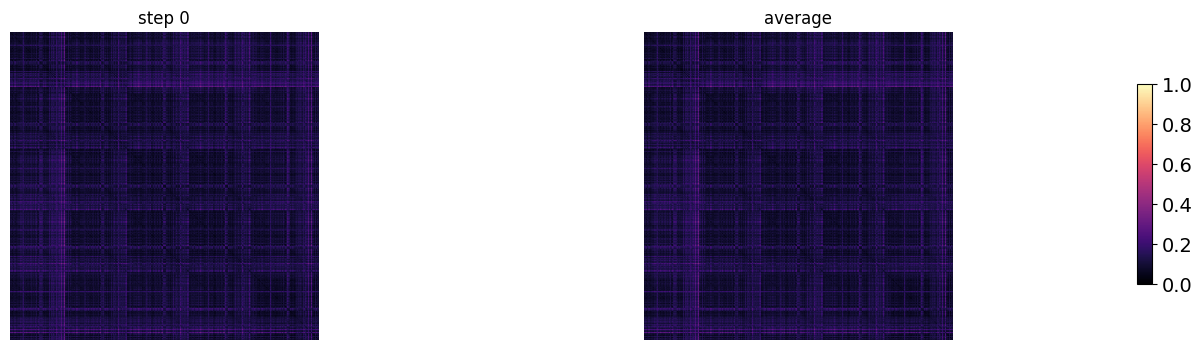

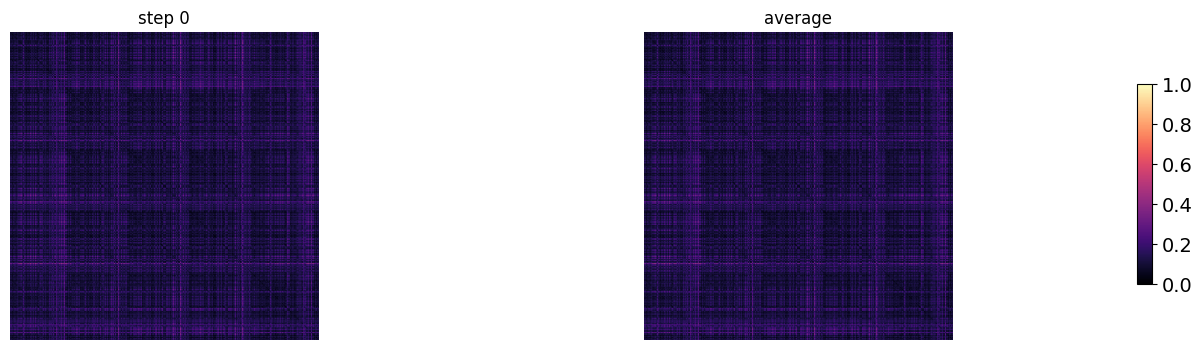

In [13]:
imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=200)
model, gap = load_model_path('./results/classification/vggface2/blt_b_pm/run_2/')
layers = ['output_5', 'output_4', 'output_3', 'output_2', 'output_1', 'output_0']
#layers = ['IT', 'V4', 'V2', 'V1']
save = 'blt_bl_imagenet_vggface2'
plot_rdm_mds(model, imgs, labels_i, layers, num_steps=1, plot='rdm', save=None)#, cmap='gray'

100%|██████████| 100/100 [00:27<00:00,  3.62it/s]


array([0.0830103 , 0.07187698, 0.07777707, 0.10239272, 0.16639652,
       0.1412144 , 0.09194512, 0.09799462, 0.10231687, 0.11103624,
       0.11658443, 0.12079141, 0.04394904, 0.05066087, 0.07205682,
       0.06528908, 0.05709504, 0.01523663])

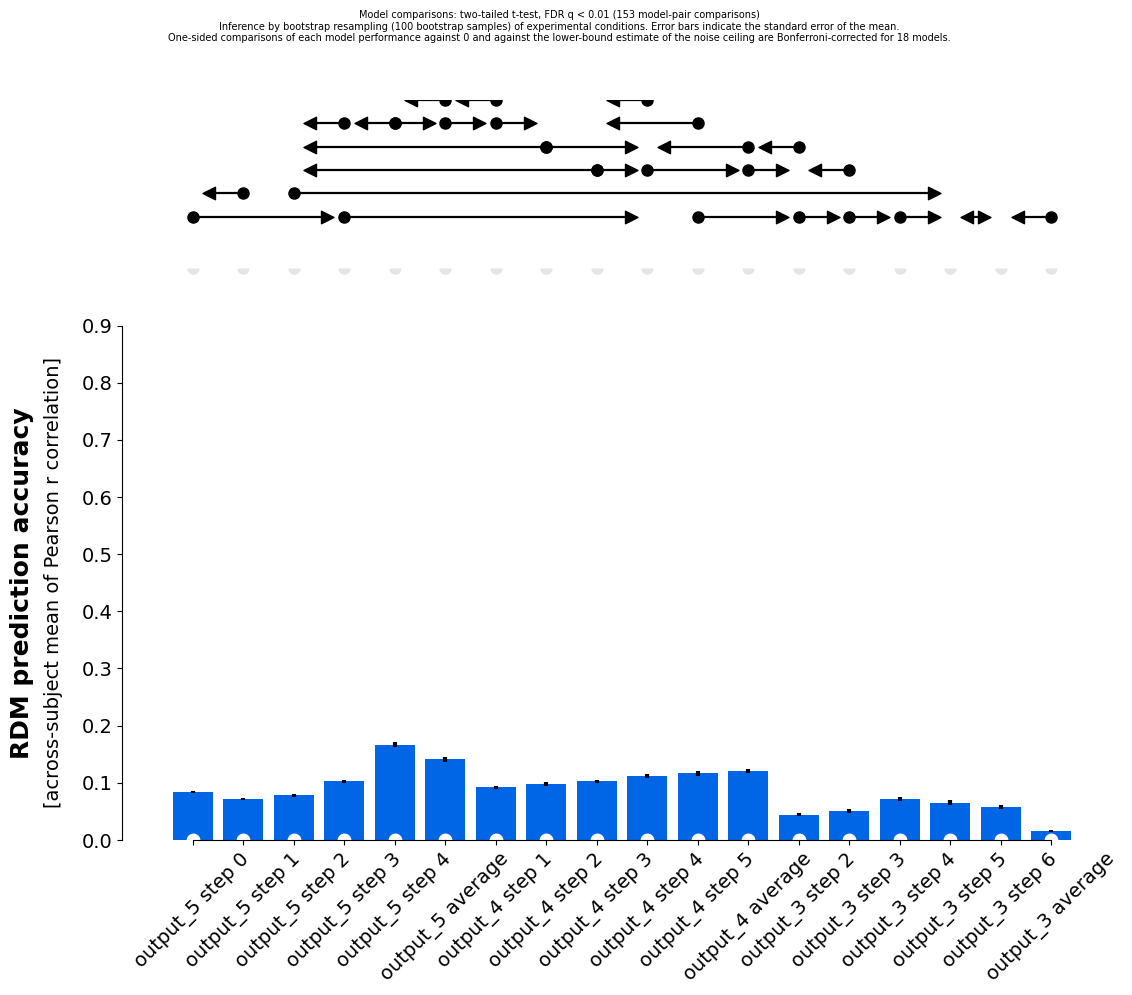

In [12]:
#imgs, labels_o, labels_m, labels_i = sample_FEI_dataset(num_ids=200)
#labels = labels_m.unsqueeze(1).float().numpy()
labels = F.one_hot(labels_i).float().numpy()
#model, gap = load_model_path('../results_new/classification/imagenet_vggface2/blt_b/run_1/')
#layers = ['output_0', 'output_1', 'output_2', 'output_3']
# layers = ['IT', 'V4', 'V2', 'V1']
neuro_data = {'neuro_data':labels}
results, pred_model_names = compare_rdms(model, imgs.to(device), layers, neuro_data, num_steps=5, method='corr')

results.to_dict()['evaluations'].mean(0)